In [1]:
from scipy.io.wavfile import read, write
import numpy as np
import matplotlib.pyplot as plt

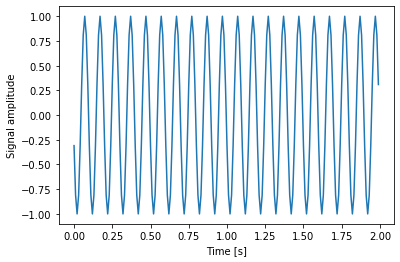

In [187]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t + 1.1*np.pi)# + 2*np.cos(np.pi + f * 3 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

(-50.0, 50.0)

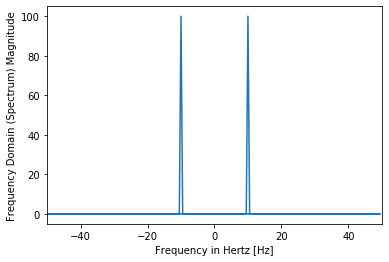

In [188]:
from scipy import fftpack
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.plot(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
# ax.set_ylim(-5, 110)

In [256]:
f_s, a = read('a3.wav')
print(f_s)
f_s, b = read('a1.wav')
print(f_s)
# c = a + b
# write('a+b.wav', sample_rate, c)
n = len(a)
print(a.dtype)
# b = np.mean(b, axis=1)

44100
44100
int16


In [257]:
a.shape, b.shape

((176575,), (176575,))

In [258]:
from skimage import util

M = 2**11
print(f_s/M)
a_slices = util.view_as_windows(a, window_shape=(M,), step=1)
a = a[M-1:]

21.533203125


In [259]:
print(a_slices.shape)
print(a.shape)

(174528, 2048)
(174528,)


In [260]:
x = np.array([np.mean(np.abs(a_slices[i])) for i in range(len(a_slices))])

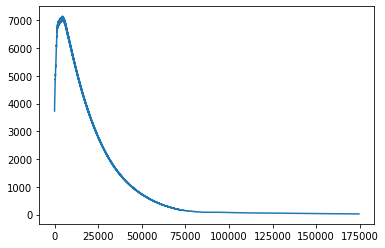

In [261]:
plt.plot(x)

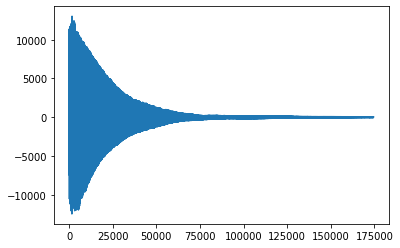

In [262]:
plt.plot(a);

In [263]:
x.shape

(174528,)

In [264]:
a_ = a/x; print(a_.dtype)

float64


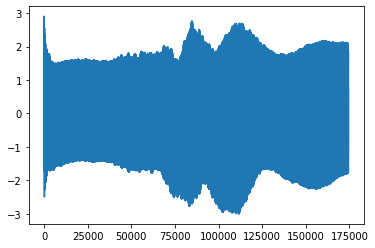

In [265]:
plt.plot(a_)

In [266]:
write('a2_.wav', f_s, a_.astype('int16'))

(174528, 1)
(174528, 2048)


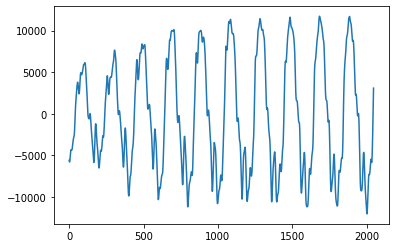

In [267]:
norm = np.expand_dims(1/x,axis=1); print(norm.shape)
a_slices_ = a_slices*norm;print(a_slices_.shape)
plt.plot(a_slices[1000])

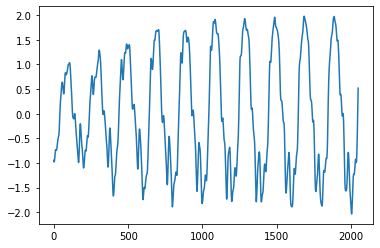

In [268]:
plt.plot(a_slices_[1000])

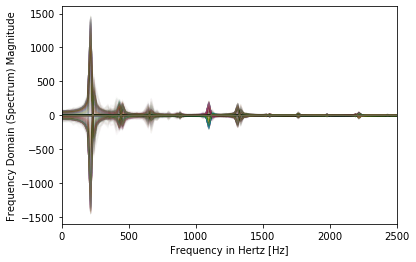

In [270]:
from scipy import fftpack
# print(X.shape); print(X[0:10])

fig, ax = plt.subplots()

ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 2500)
# ax.set_ylim(0, 110)
for i in range(1000):
    x = a_slices_[4*i]
    freqs = fftpack.fftfreq(len(x)) * f_s
    X = fftpack.fft(x);
    ax.plot(freqs, np.real(X), alpha=0.01)

In [182]:
np.mean(x)

-0.0678064735107863

(0, 2500)

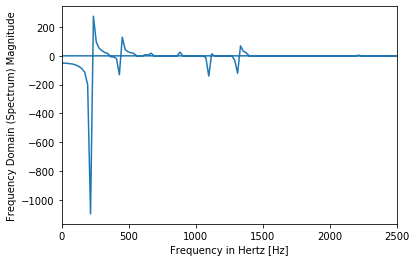

In [253]:
XX = X.copy()
XX[np.abs(X) < 20] = 0
fig, ax = plt.subplots()
ax.plot(freqs, np.real(XX))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 2500)

In [131]:
xx = fftpack.ifft(XX)

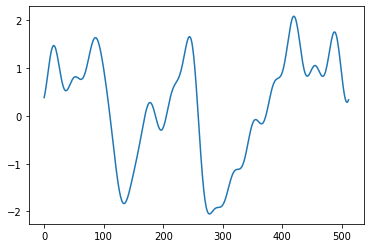

In [132]:
plt.plot(np.real(xx));

In [142]:
spectrum = np.fft.fft(a_slices_, axis=0)
spectrum = np.abs(spectrum)

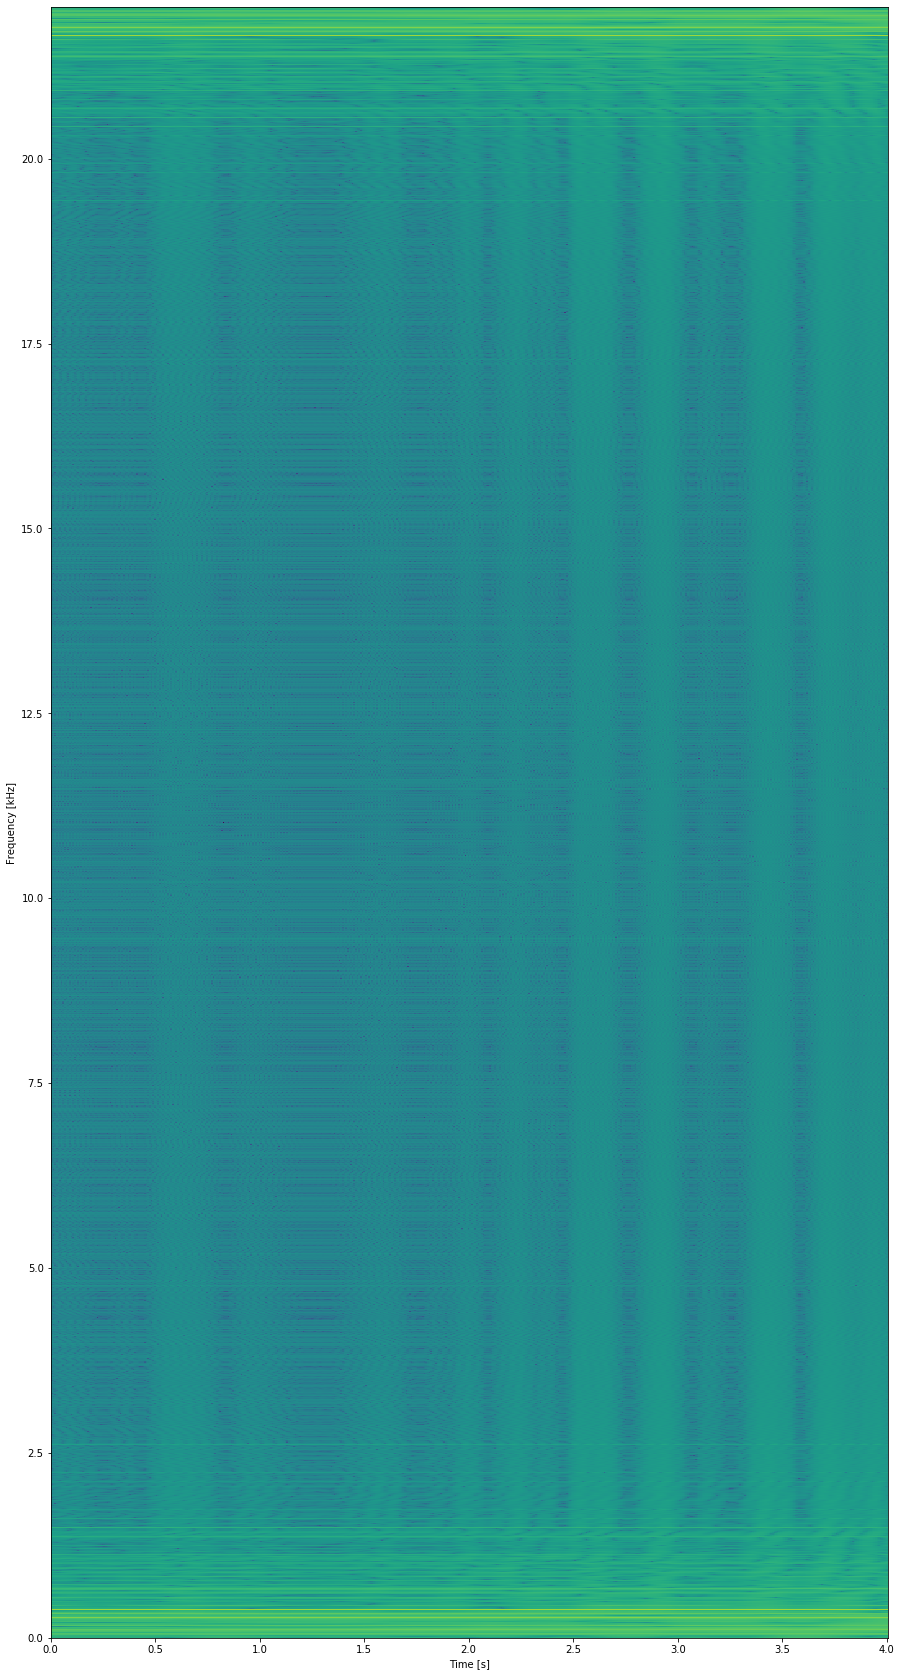

In [144]:
f, ax = plt.subplots(figsize=(15, 30))

S = np.real(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, L, 0, f_s / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

In [125]:
slices = Strider(b,window=1000, stride=100)[1000:]

In [126]:
slices

array([[-1054., -1047., -1037., ...,   463.,   501.,   539.],
       [ 1396.,  1373.,  1362., ...,  -868.,  -851.,  -821.],
       [ 1030.,  1032.,  1041., ...,   885.,   854.,   816.],
       ...,
       [  -63.,   -58.,   -45., ...,     9.,    19.,    27.],
       [  -19.,    -6.,    -9., ...,    -8.,   -15.,   -19.],
       [  125.,   111.,    92., ...,     4.,     3.,     3.]])

In [127]:
spectrum = np.fft.fft(slices, axis=1)
spectrum = np.abs(spectrum)
spectrum = 20 * np.log10(spectrum / np.max(spectrum))

In [128]:
spectrum

array([[-35.37882403, -26.22617394, -18.15665049, ...,  -7.779595  ,
        -18.15665049, -26.22617394],
       [-42.84720893, -25.1468123 , -17.29496193, ...,  -7.69745168,
        -17.29496193, -25.1468123 ],
       [-24.45558783, -22.80734897, -18.31835429, ...,  -8.99520018,
        -18.31835429, -22.80734897],
       ...,
       [-42.63617477, -46.03223783, -39.75705811, ..., -33.39927385,
        -39.75705811, -46.03223783],
       [-52.09707641, -57.94641666, -44.88905459, ..., -35.3396285 ,
        -44.88905459, -57.94641666],
       [-42.72599088, -40.17203097, -43.83462917, ..., -38.83023024,
        -43.83462917, -40.17203097]])

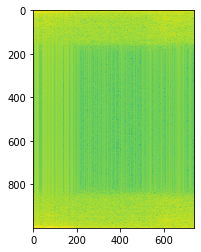

In [129]:
plt.imshow(spectrum.T);

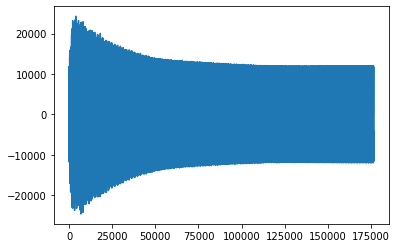

In [15]:
r = np.array(range(1,n+1))
x = (np.sin(0.2*r)*(n)/15).astype('int16') + a;x
plt.plot(x)
write('x.wav', sample_rate, x+a)

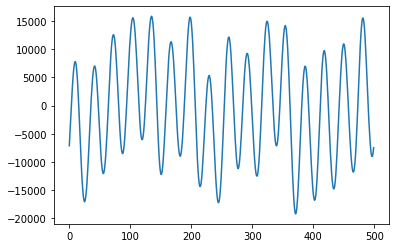

In [16]:
plt.plot(x[500:1000]);

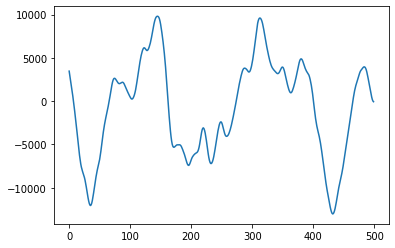

In [17]:
plt.plot(a[1500:2000]);

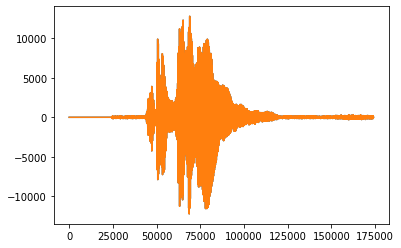

In [110]:
plt.plot(b);